In [24]:
import os
import sys
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy.special import expit

import import_ipynb
from part1_data_fitting import Model

In [25]:
FIG_FOLDER = 'fig'
SOURCE_FOLDER = os.path.join('data', 'source')
BACKUP_FOLDER = os.path.join('data', 'backup')
print(f"The source folder is: {os.path.abspath(SOURCE_FOLDER)}")
print(f"The figure folder is: {os.path.abspath(FIG_FOLDER)}")
print(f"The backup folder is: {os.path.abspath(BACKUP_FOLDER)}")

# Create folders
for f in SOURCE_FOLDER, FIG_FOLDER, BACKUP_FOLDER:
    os.makedirs(f, exist_ok=True)

The source folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/data/source
The figure folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/fig
The backup folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/data/backup


### Load the results

In [26]:
df_fit = pd.read_csv(os.path.join(BACKUP_FOLDER, "df_fit_w10.csv"), index_col=0)
df_fit.date = pd.to_datetime(df_fit.date)
df_fit

distortion  precision  risk_aversion       date monkey condition    n
0     0.200000   4.270073       0.990000 2020-06-25    Ola      gain  184
1     0.200000   2.770975       0.371047 2020-06-26    Ola      gain  190
2     0.200000   3.808986       0.430657 2020-06-27    Ola      gain  208
3     0.200000   3.722515       0.085129 2020-06-28    Ola      gain  220
4     0.200000   4.670508       0.132597 2020-06-29    Ola      gain  244
..         ...        ...            ...        ...    ...       ...  ...
57    0.200000  10.000000      -0.990000 2020-10-20    Yin      loss   77
58    0.313026  10.000000      -0.990000 2020-10-21    Yin      loss   71
59    0.200000  10.000000      -0.990000 2020-10-22    Yin      loss   70
60    1.159000  10.000000       0.790311 2020-10-24    Yin      loss   66
61    1.800000   5.961292      -0.990000 2020-10-25    Yin      loss   60

[2612 rows x 7 columns]

In [27]:
df_elo = pd.read_csv(os.path.join(BACKUP_FOLDER, "df_elo.csv"), index_col=0)
df_elo.index = pd.to_datetime(df_elo.index)
df_elo

nem   yak   ner   yoh   nen   wot   pac  las   anu   ola  ...  \
date                                                                   ...   
2016-10-25  1024  1009  1018   984   991  1010   991  982   991  1000  ...   
2016-10-26  1032  1009  1018  1003   991  1010   982  964   991   999  ...   
2016-10-27  1032  1009  1018  1003   991  1010   982  956   991   999  ...   
2016-10-28  1041  1009  1018  1003   991  1010   982  956   991   999  ...   
2016-10-29  1063  1009  1018  1011   991  1010   975  941   984  1008  ...   
...          ...   ...   ...   ...   ...   ...   ...  ...   ...   ...  ...   
2020-10-21   938  1243   961   840  1018  1234  1379  713  1117  1287  ...   
2020-10-22   970  1243   962   840  1018  1234  1347  716  1105  1296  ...   
2020-10-23   971  1243   970   840  1018  1234  1347  735  1105  1296  ...   
2020-10-24   971  1243   981   840  1018  1234  1352  731  1105  1291  ...   
2020-10-25   974  1243   992   840  1018  1234  1357  724  1105  1296  ...   

             olg   jea   pat   bar   ces   lad   ber   dor   eri   fic  
date                                                                    
2016-10-25  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  
2016-10-26  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  
2016-10-27  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  
2016-10-28  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  
2016-10-29  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
2020-10-21   933   760   841  1083   837   753   743   766   702   579  
2020-10-22   935   755   841  1070   832   753   743   795   702   566  
2020-10-23   920   751   841  1072   838   753   758   773   668   566  
2020-10-24   923   750   841  1062   822   753   758   781   666   580  
2020-10-25   908   740   841  1062   807   753   763   787   675   575  

[1462 rows x 27 columns]

### Plot

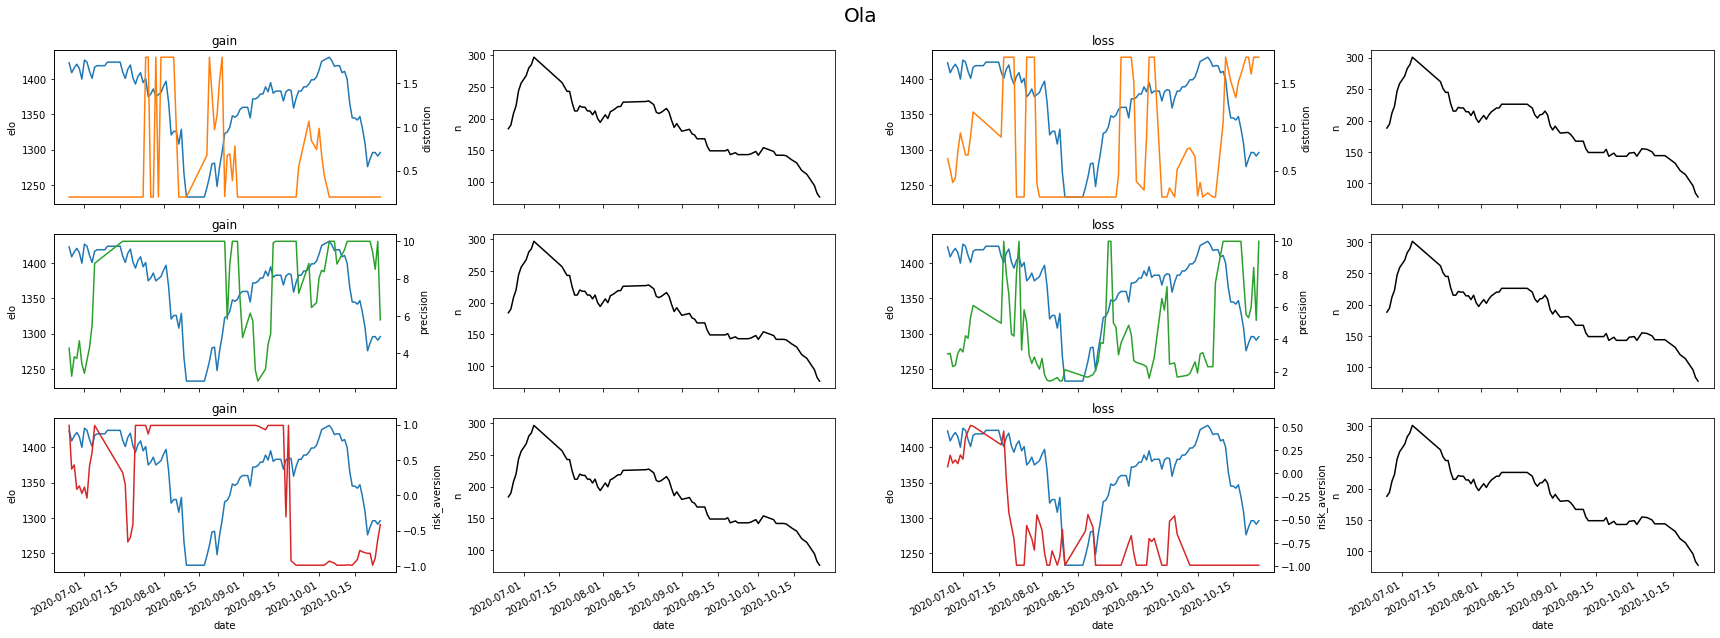

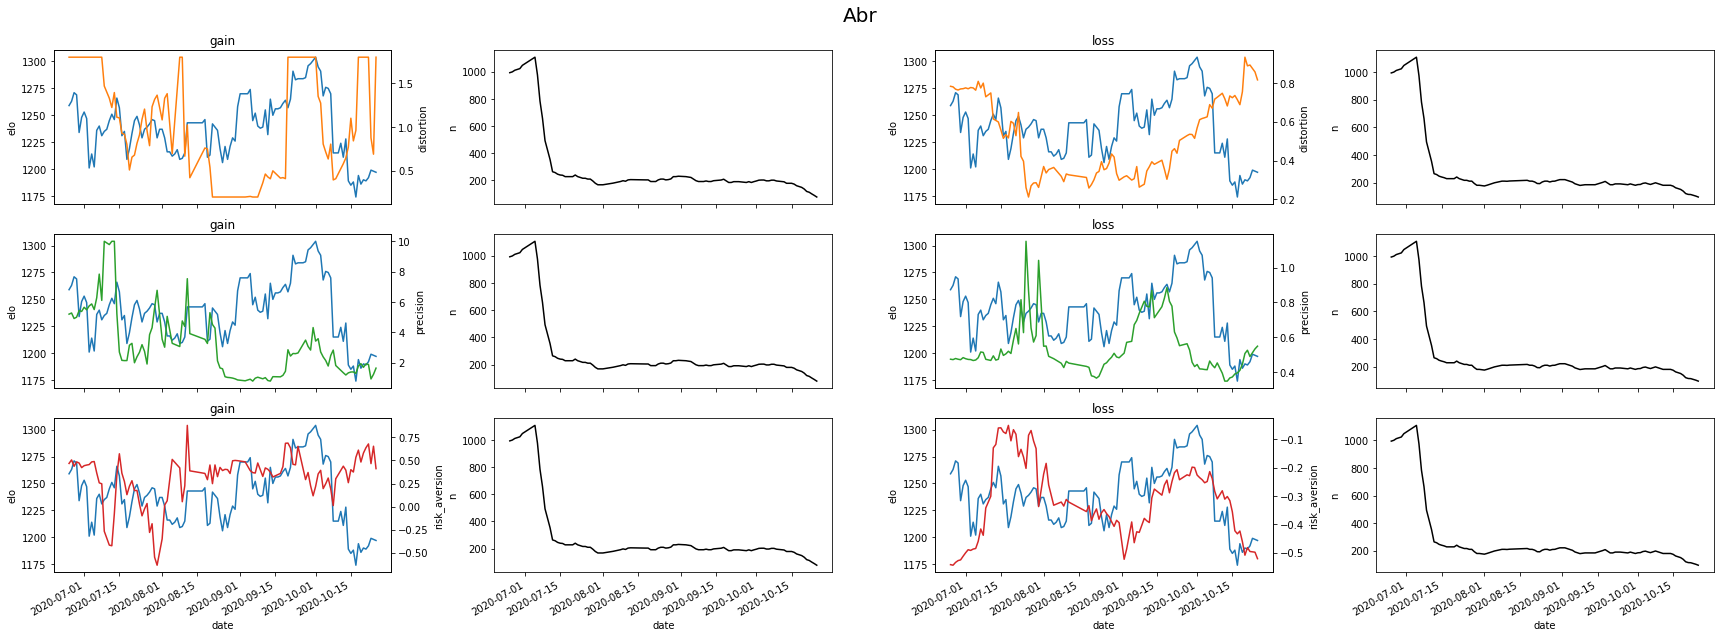

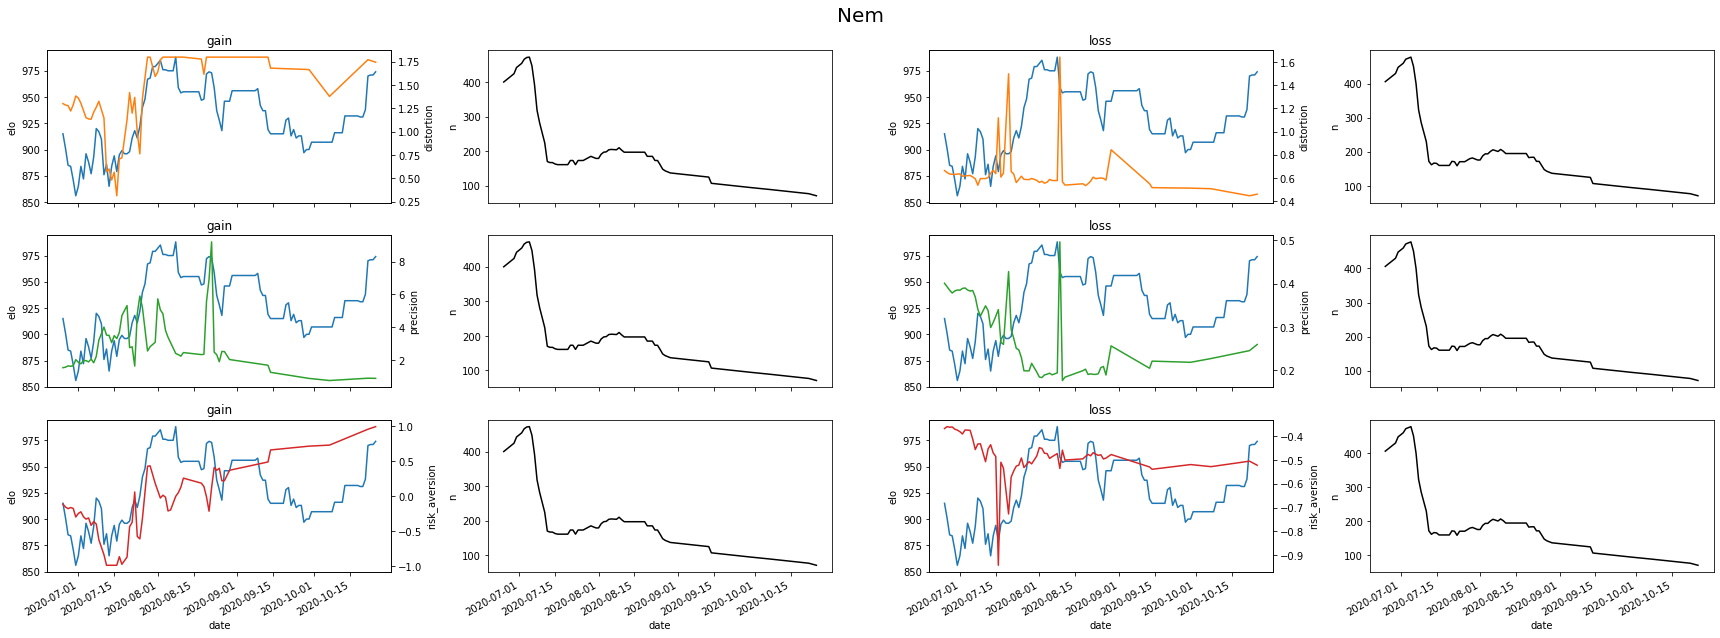

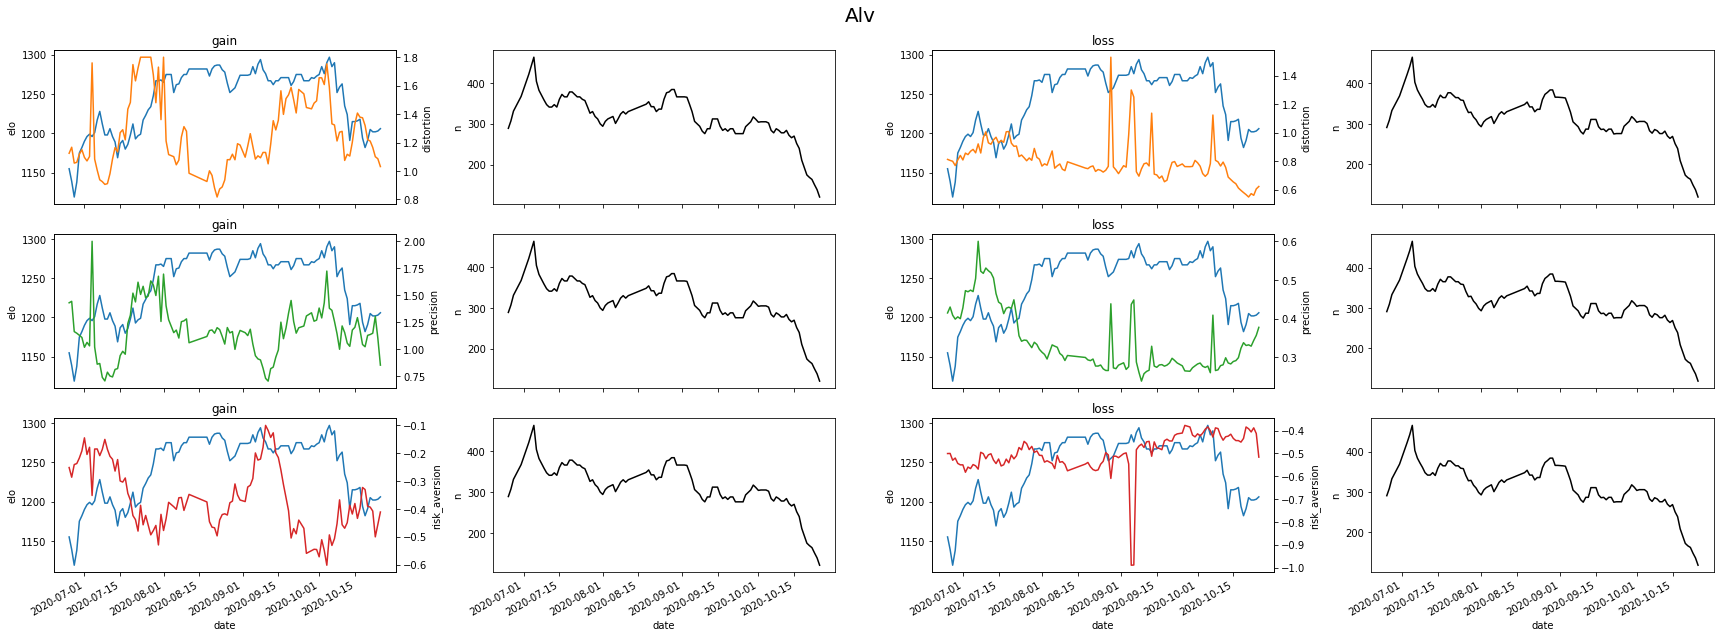

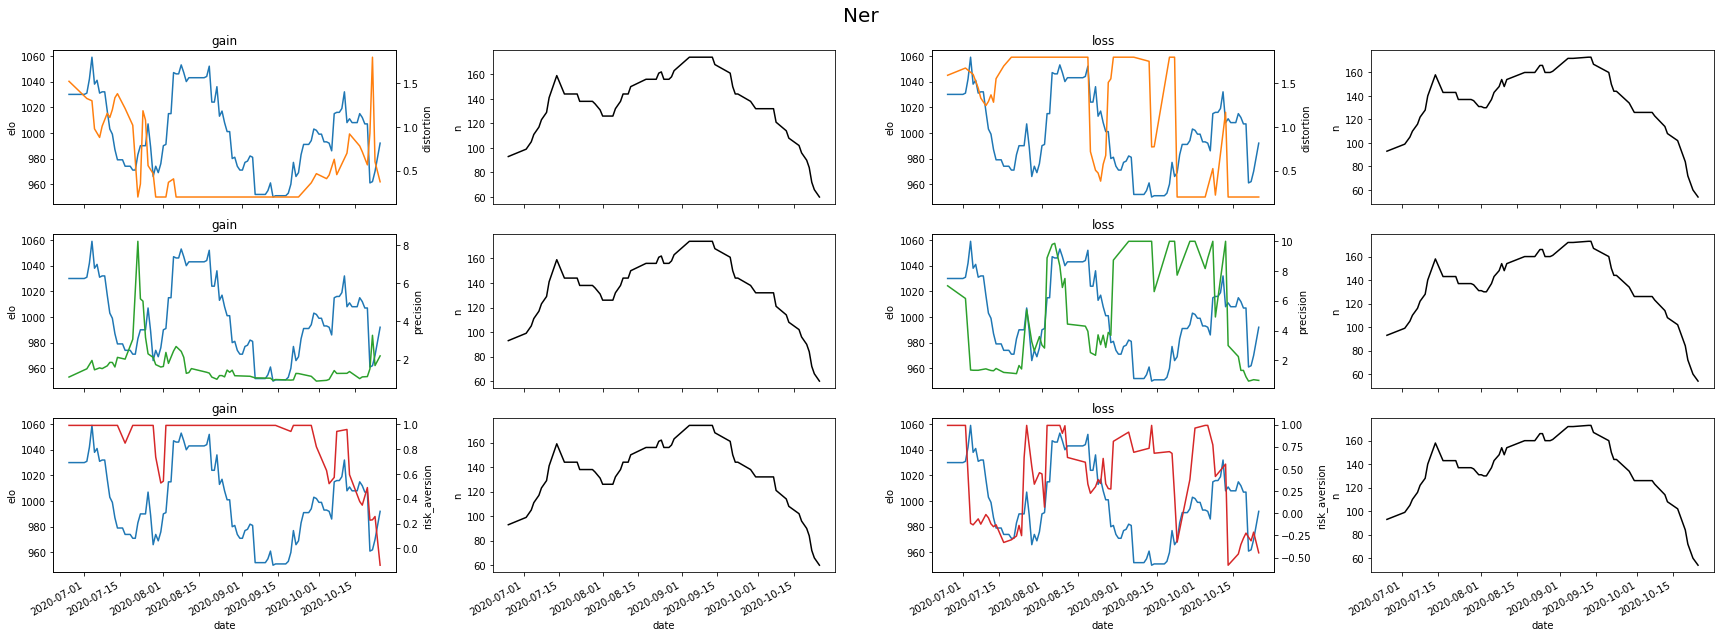

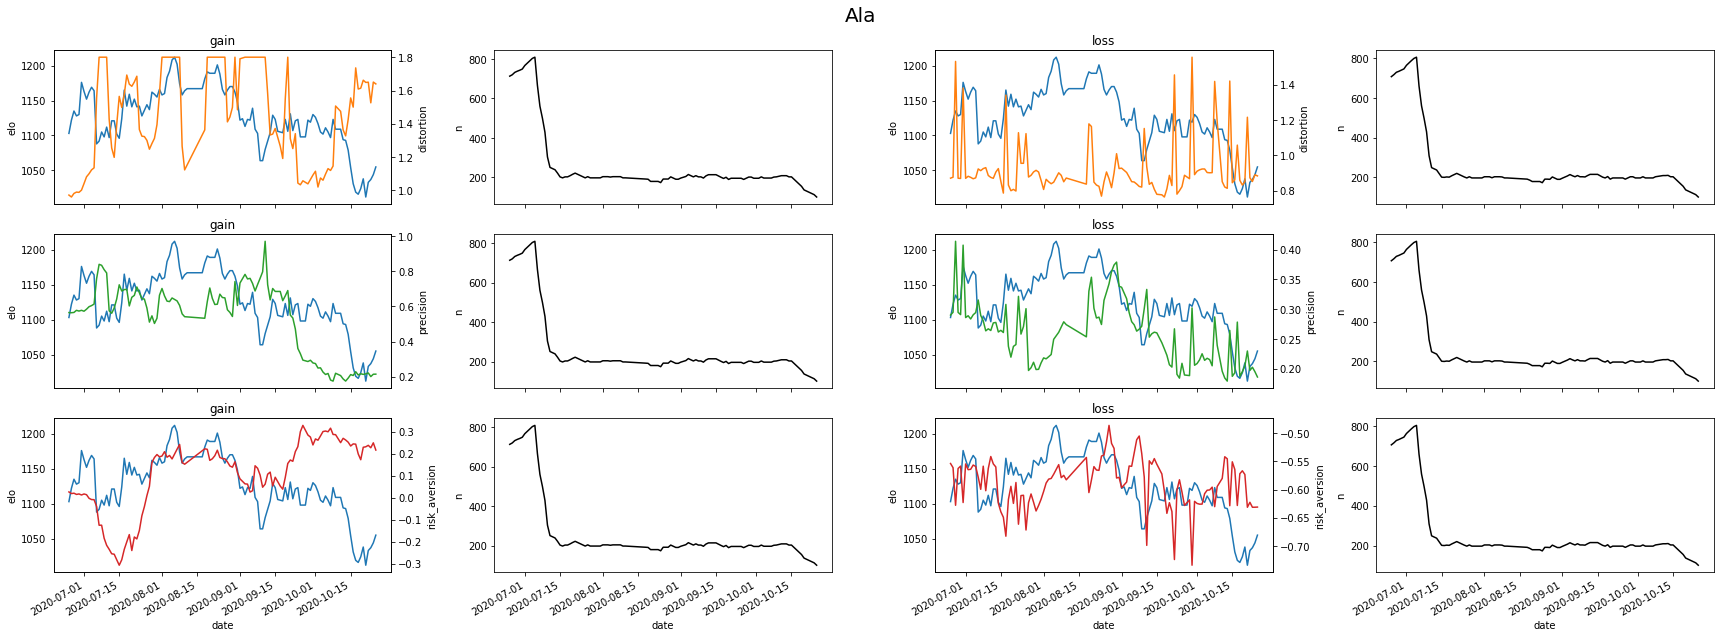

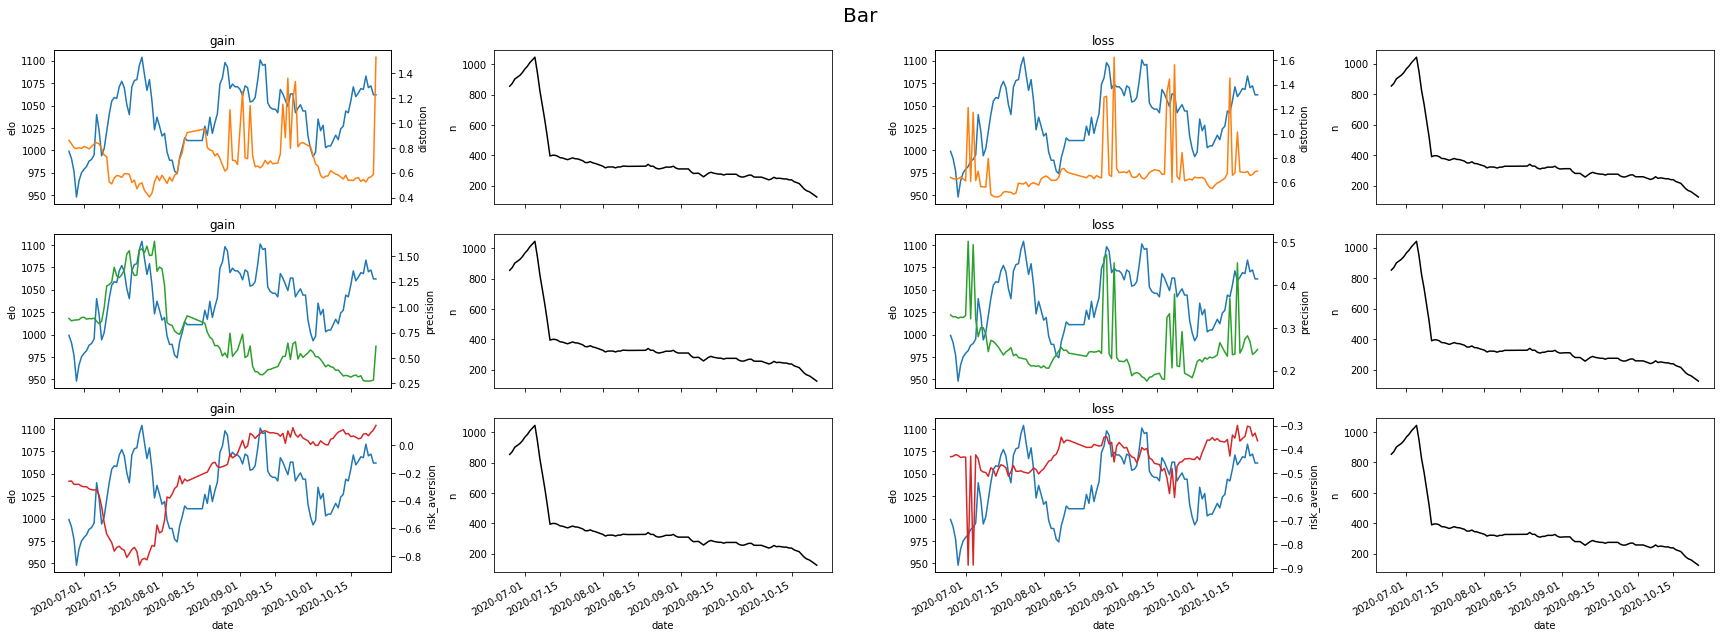

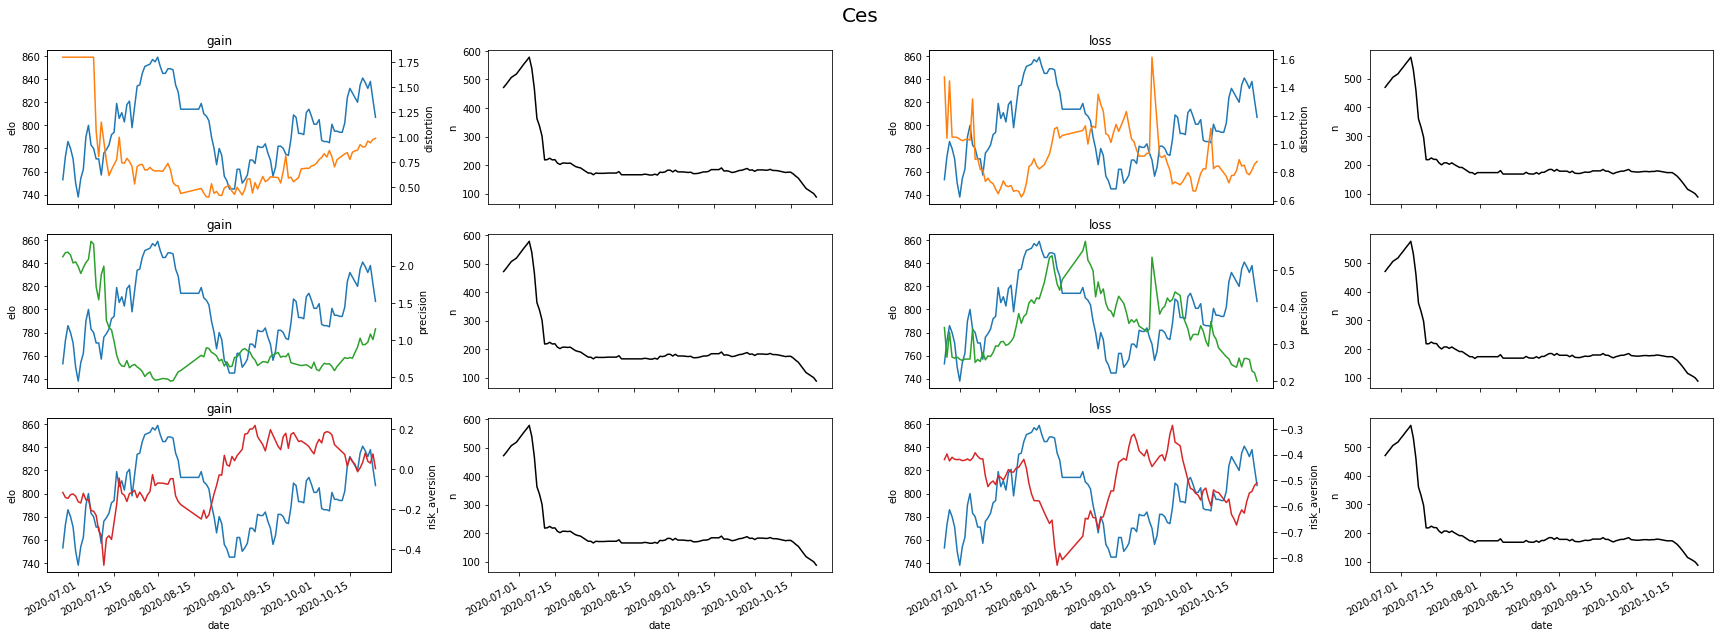

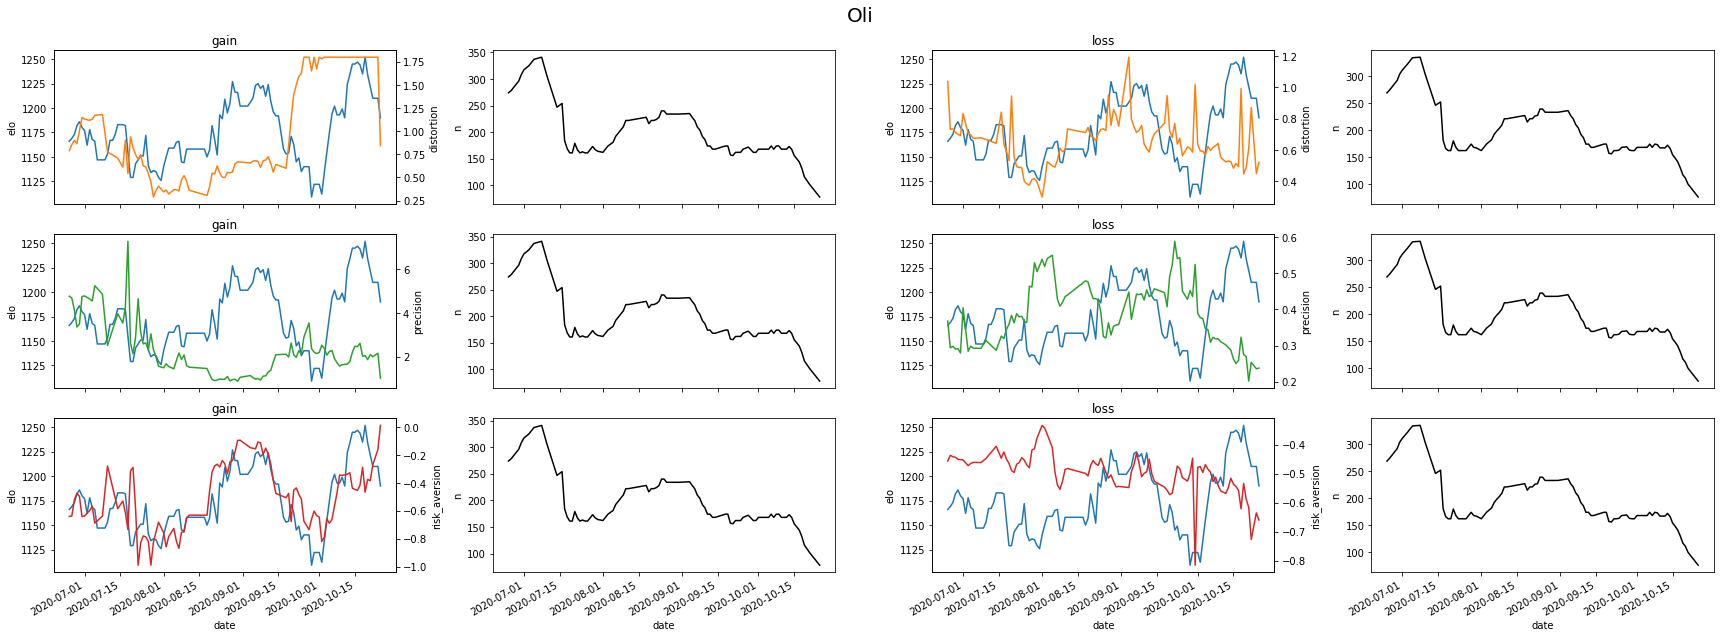

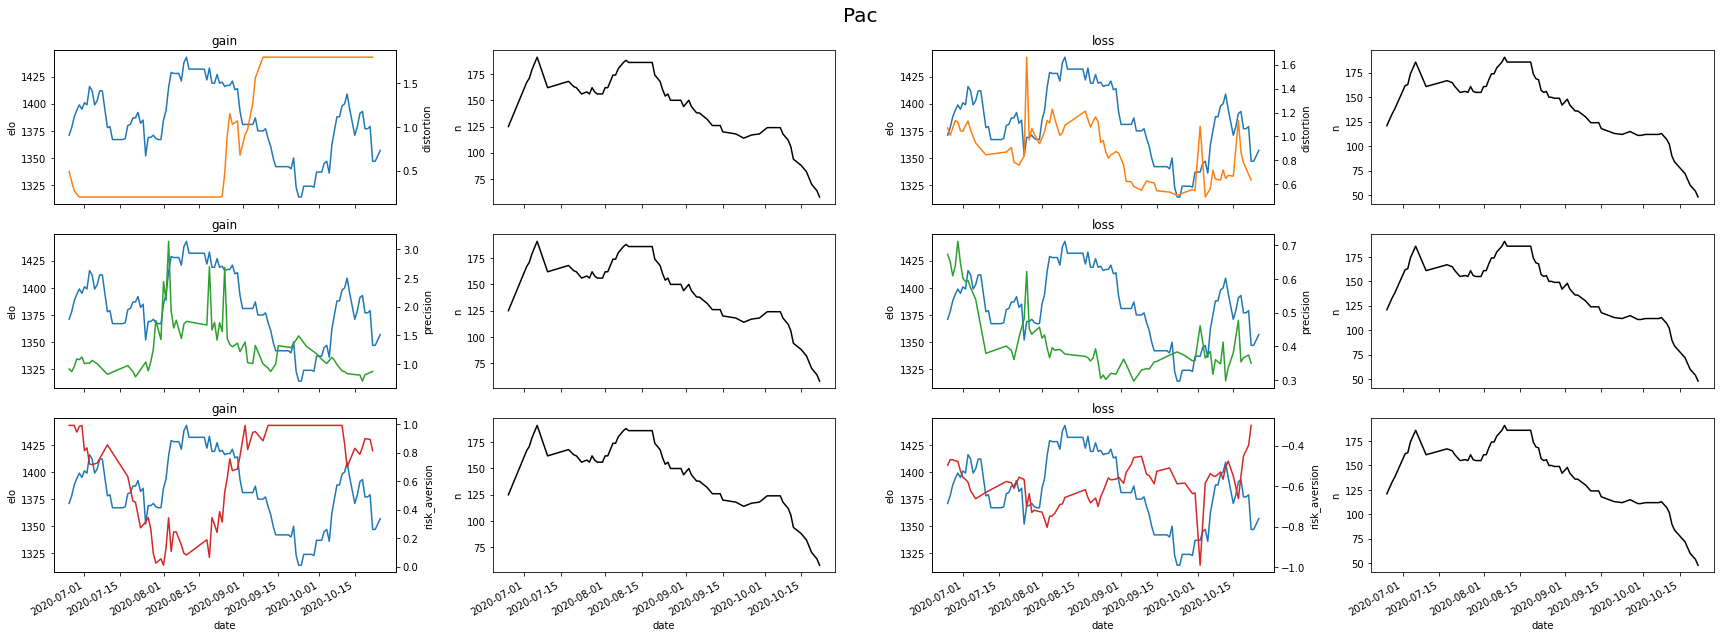

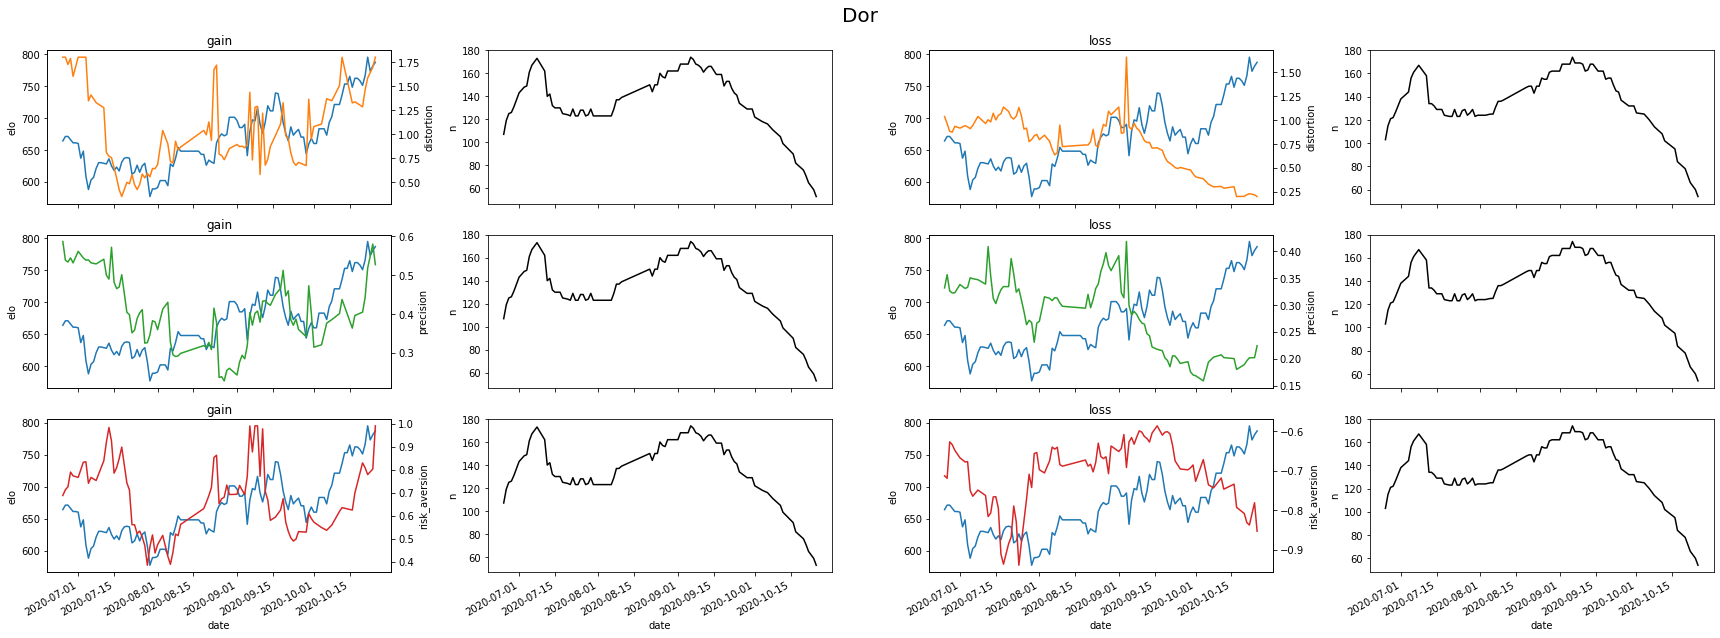

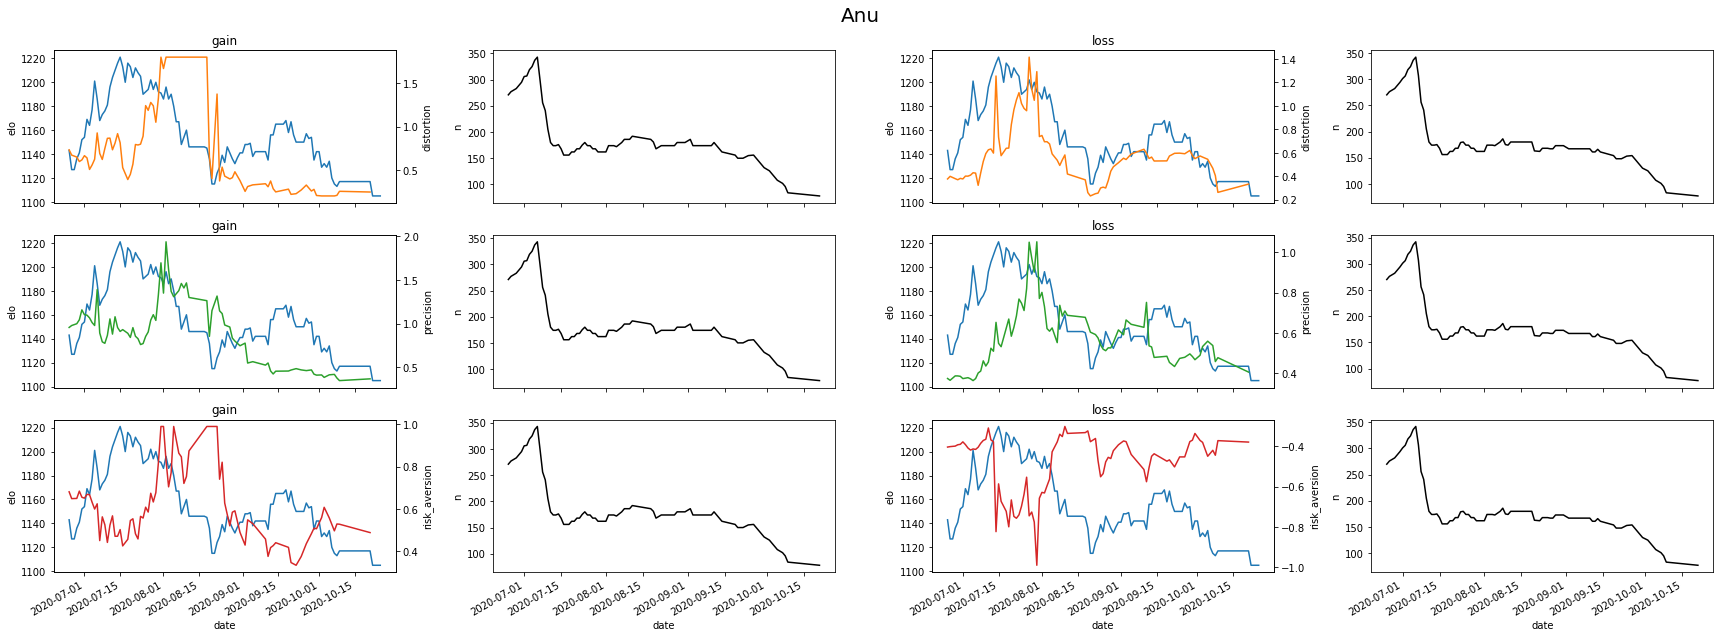

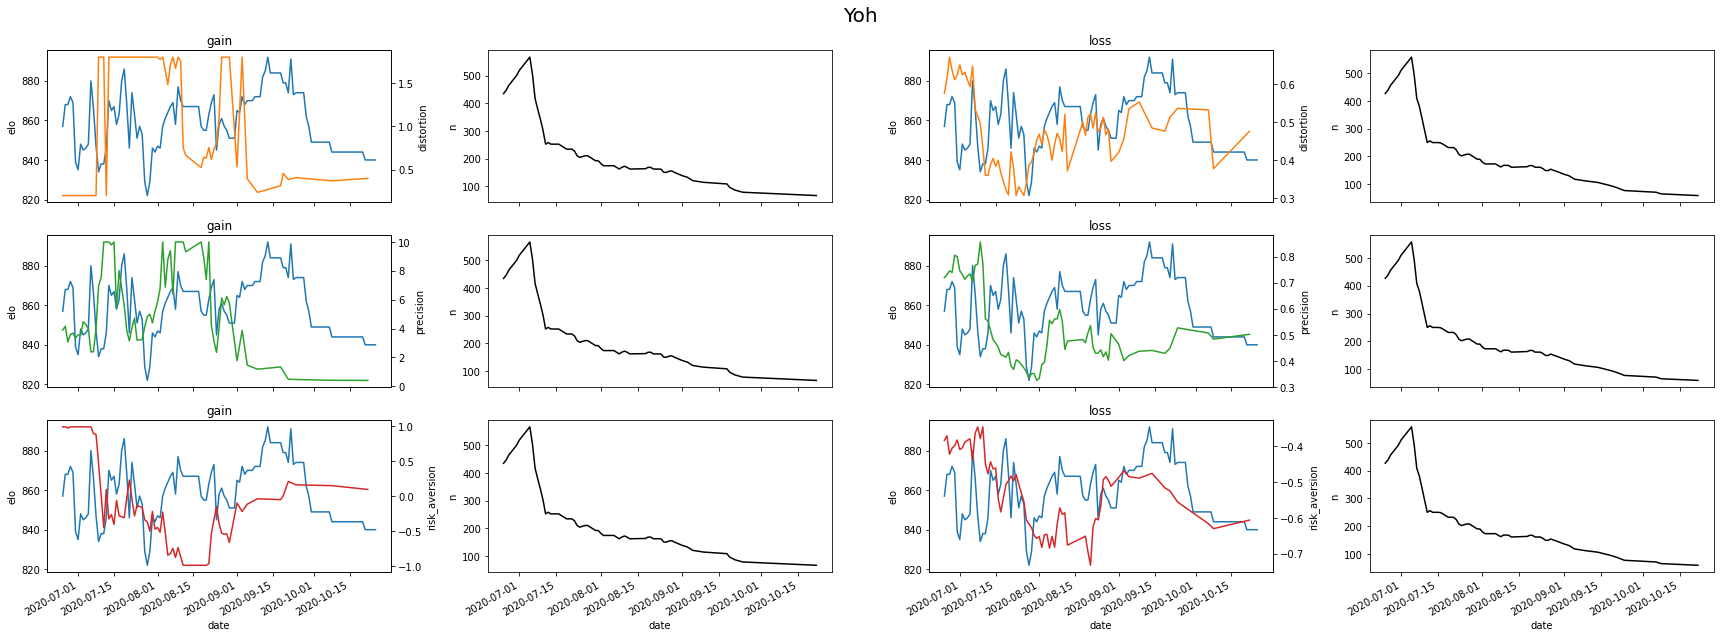

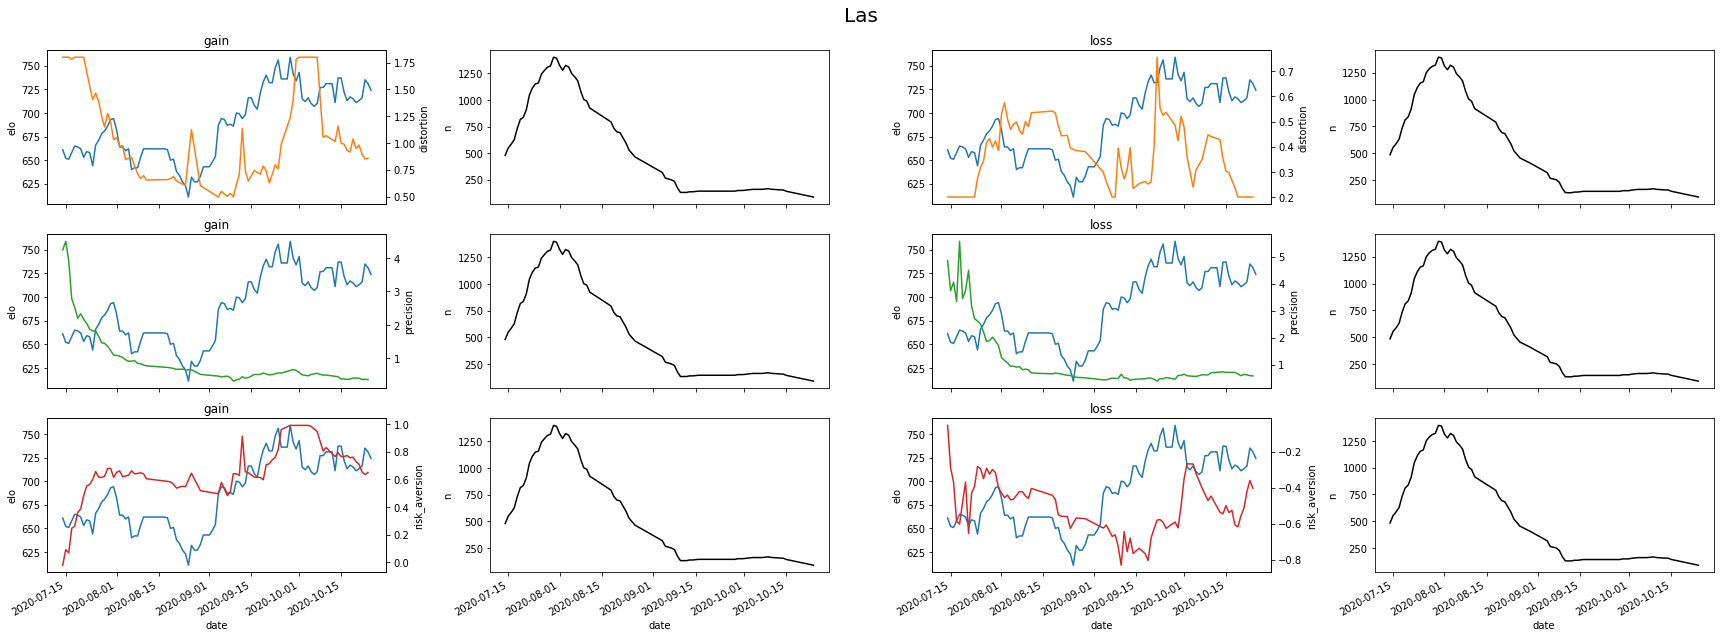

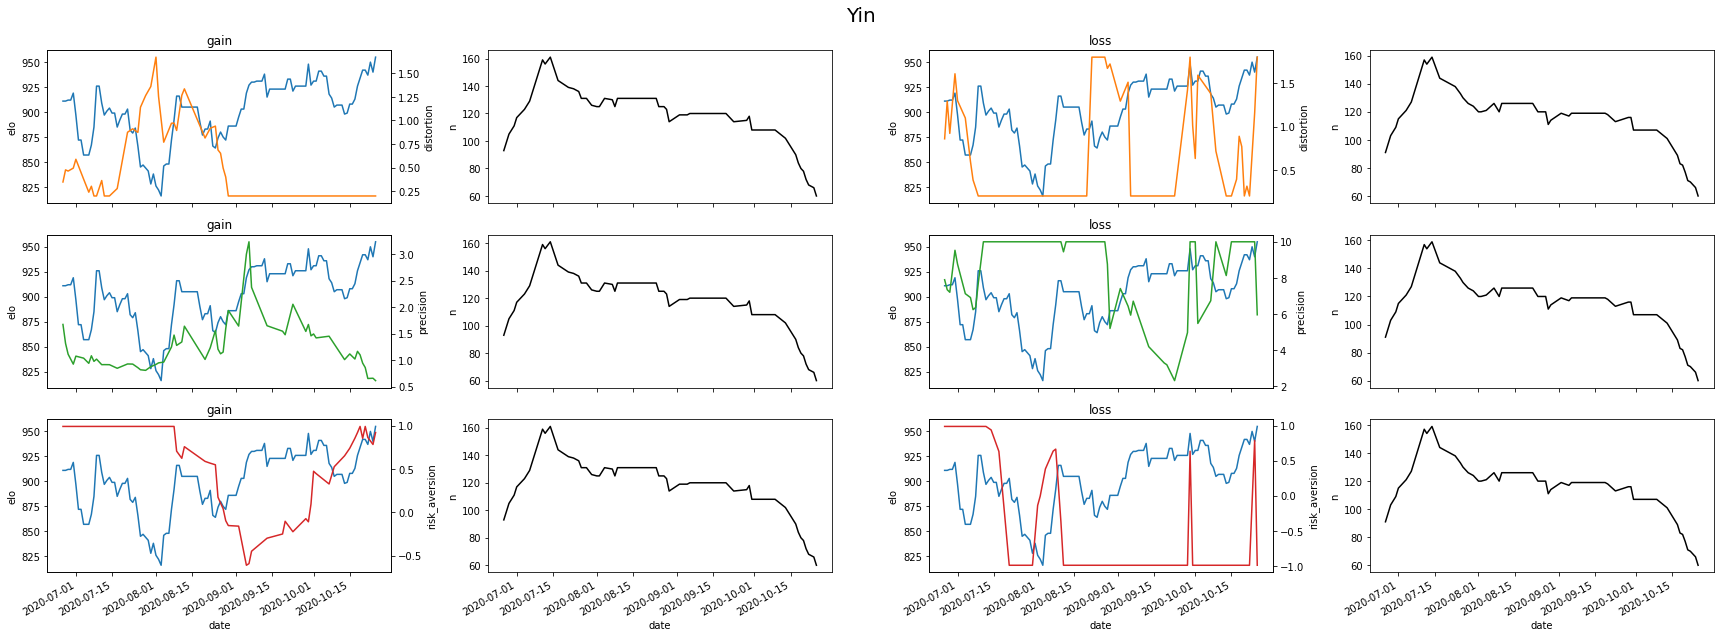

In [28]:
monkeys = df_fit.monkey.unique()
cond = df_fit.condition.unique()
n_param = len(Model.param_labels)
n_rows = n_param
n_cols = len(cond)*2

for i, m in enumerate(monkeys):
    
    fig, axes = plt.subplots(figsize=(6*n_cols, 3*n_rows), nrows=n_rows, ncols=n_cols)
    fig.suptitle(m, fontsize=20)
    colors = [f"C{k}" for k in range(1, n_param+1)]
    
    for j, cd in enumerate(cond):
        
        df_p = df_fit[(df_fit.monkey == m) & (df_fit.condition == cd)]
        
        df_elo_m = df_elo[m.lower()]
        df_elo_m = df_elo_m[df_elo_m.index >= min(df_p.date)]
        
        for k in range(n_param):

            ax = axes[k, j*2]
            ax.set_title(cd)
            param = Model.param_labels[k]
            # lim_param = Model.fit_bounds[k]
            color = colors[k]

            sns.lineplot(data=df_elo_m, ax=ax)
            ax.set_ylabel("elo")
            # ax.set_ylim(min_elo, max_elo)
            
            ax_tw = ax.twinx()
            # ax_tw.set_ylim(lim_param)
            sns.lineplot(x="date", y=param, data=df_p, ax=ax_tw, color=color)
            
            ax = axes[k, j*2 + 1]
            sns.lineplot(x=df_p.date, y="n", data=df_p, ax=ax, color='black')
    
    fig.autofmt_xdate()
    
    plt.tight_layout()
    plt.show()

### With 'min max' scaling

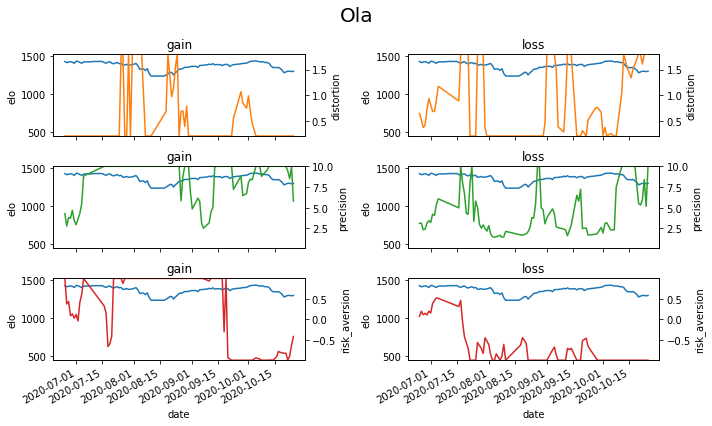

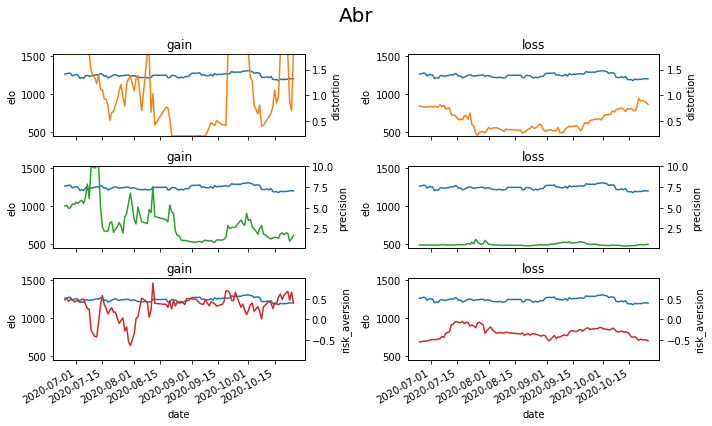

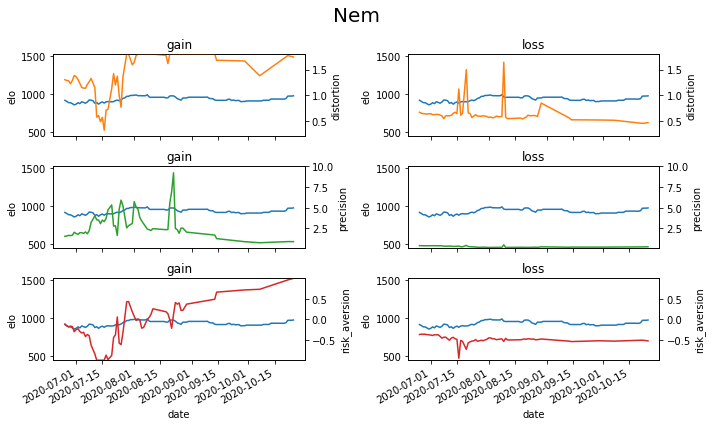

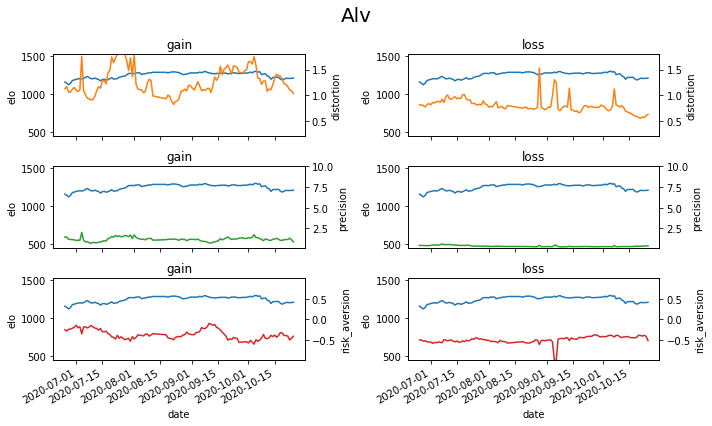

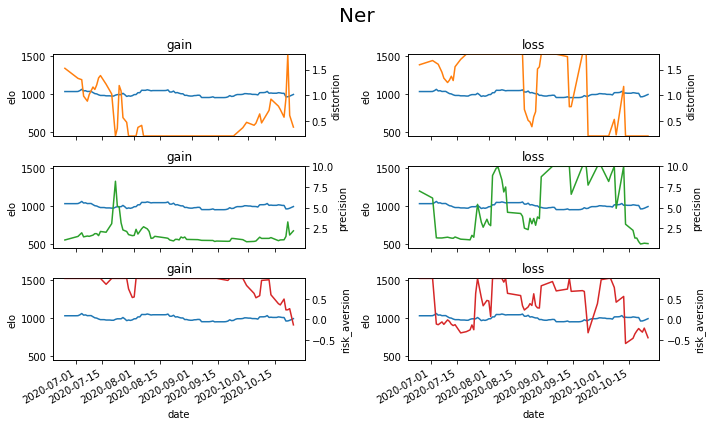

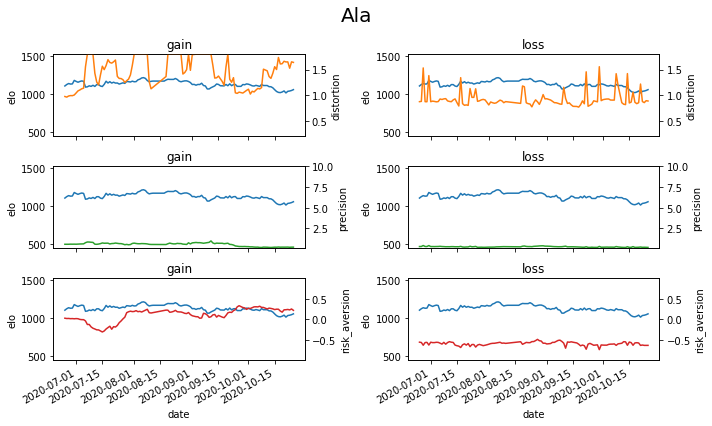

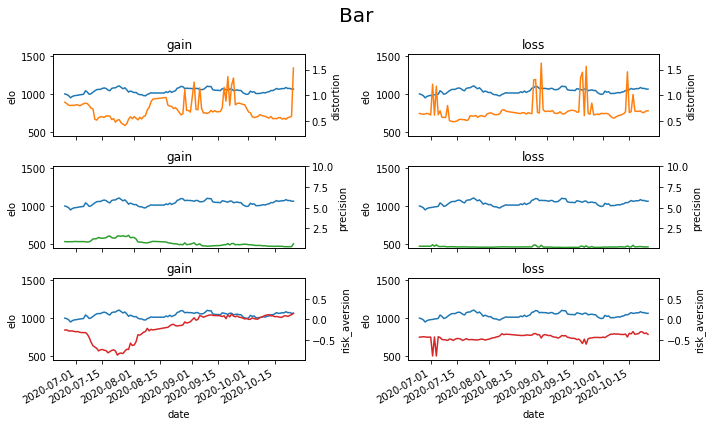

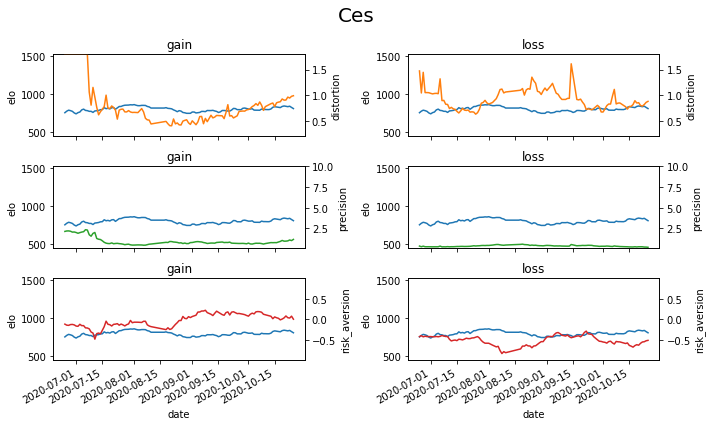

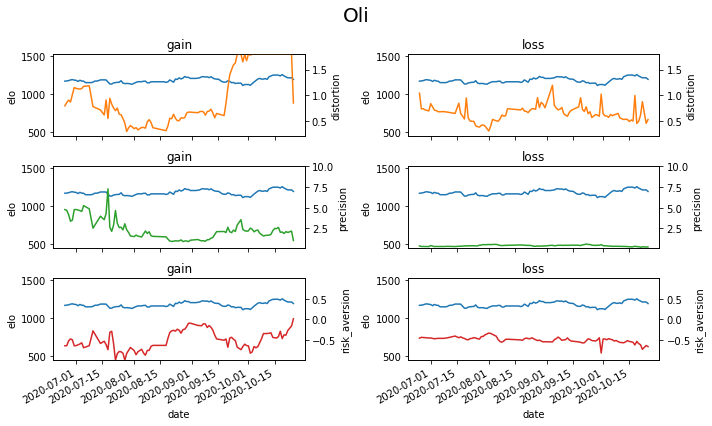

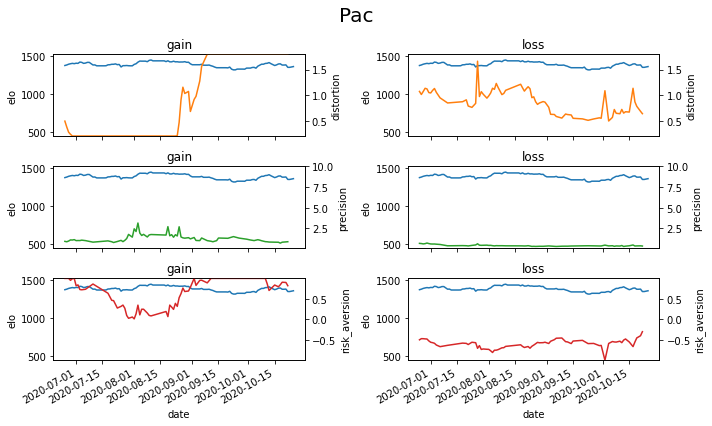

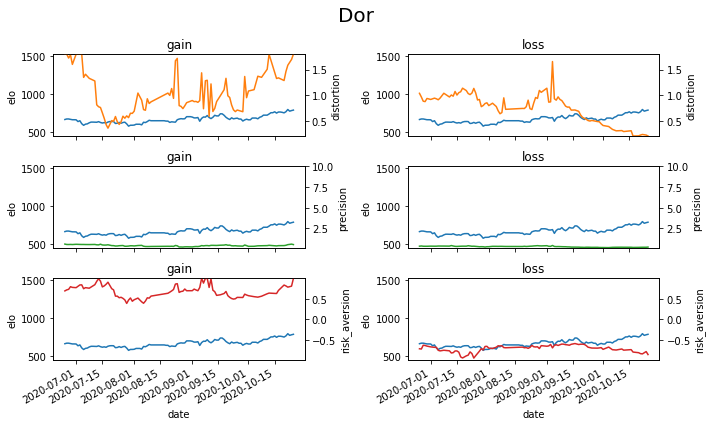

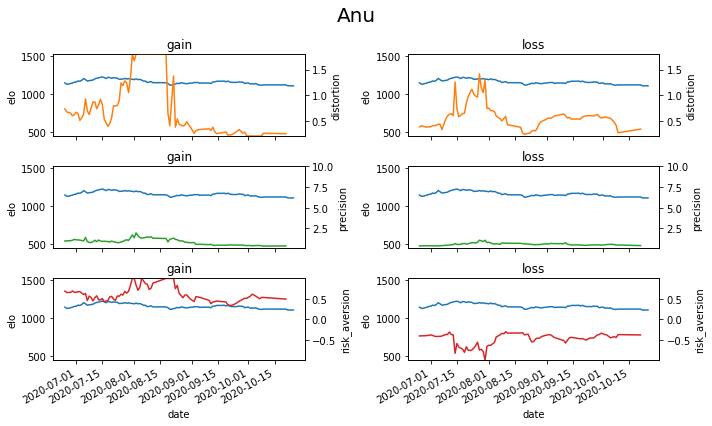

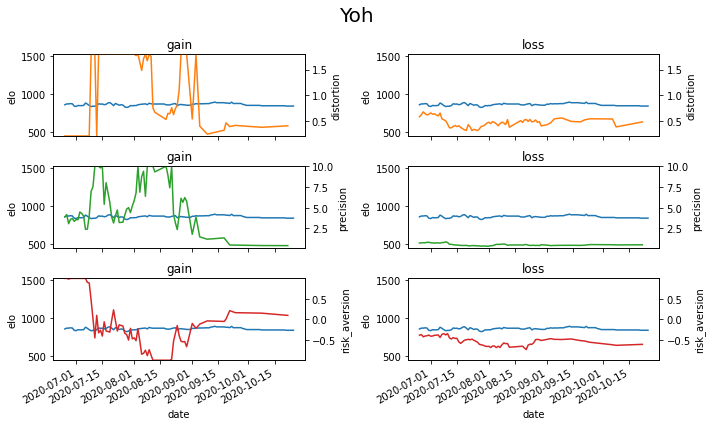

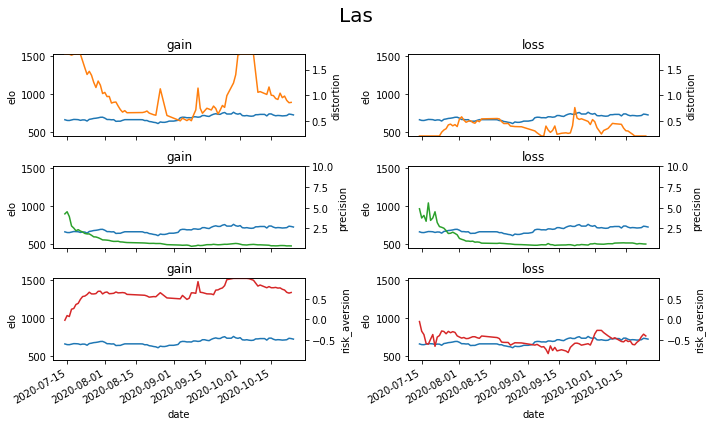

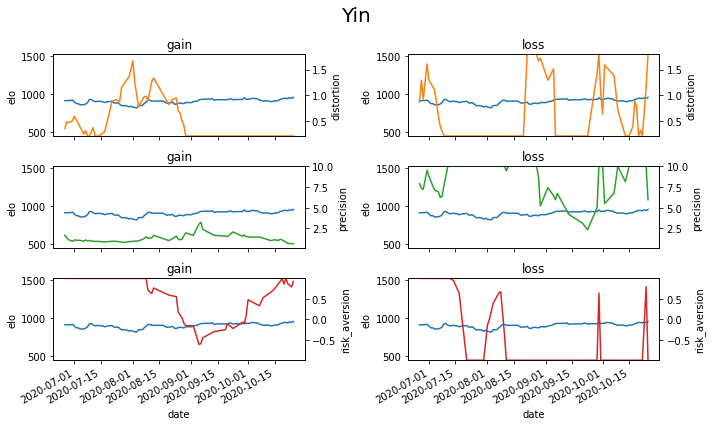

In [29]:
min_elo = np.min(np.min(df_elo))
max_elo = np.max(np.max(df_elo))

monkeys = df_fit.monkey.unique()
cond = ("gain", "loss")

for i, m in enumerate(monkeys):
    
    fig, axes = plt.subplots(figsize=(10, 2*n_param), nrows=n_param, ncols=len(cond))
    fig.suptitle(m, fontsize=20)
    colors = [f"C{k}" for k in range(1, n_param+1)]
    
    for j, cd in enumerate(cond):
        
        df_p = df_fit[(df_fit.monkey == m) & (df_fit.condition == cd)]
        
        df_elo_m = df_elo[m.lower()]
        df_elo_m = df_elo_m[df_elo_m.index >= min(df_p.date)]
        
        for k in range(n_param):

            ax = axes[k, j]
            ax.set_title(cd)
            param = Model.param_labels[k]
            lim_param = Model.fit_bounds[k]
            color = colors[k]

            sns.lineplot(data=df_elo_m, ax=ax)
            ax.set_ylabel("elo")
            ax.set_ylim(min_elo, max_elo)
            
            ax_tw = ax.twinx()
            ax_tw.set_ylim(lim_param)
            sns.lineplot(x="date", y=param, data=df_p, ax=ax_tw, color=color)
    
    fig.autofmt_xdate()
    
    plt.tight_layout()
    plt.show()